# PROYECTO FINAL THYROIDS DISEASE

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2019-1

#### Profesor: Julian David Arias Londoño

### Estudiantes

#### Nombre: Danny Francisco Hernández Godoy

#### Cédula: 1105784633

#### Nombre: Daniel Martínez Galeano

#### Cédula: 1036645337


In [0]:
from __future__ import division

import numpy as np

#cargamos la base de datos
train = np.loadtxt('/content/ann-train(1).data',delimiter='\t')  # Assuming tab-delimiter
test = np.loadtxt('/content/ann-test(1).data',delimiter='\t')  # Assuming tab-delimiter

#Dividimos los datos de entrenamiento, las variables en X y el resultado o las clases en Y
X_train_primero = train[:,0:21]
Y_train_primero = train[:,21]
#Tomamos el número de variables del problema
variables = np.size(X_train_primero,1)
#Tomamos el número de muestras de la base de datos
muestras = np.size(X_train_primero,0)
print ("Entrenamiento:\nNumero de Variables: ", variables, " \nNumero de Registros: ", muestras,"\n")

#Dividimos los datos de validación, las variables en X y el resultado o las clases en Y
X_test_primero = test[:,0:21]
Y_test_primero = test[:,21]
#Tomamos el número de variables del problema
d = np.size(X_test_primero,1)
#Tomamos el número de muestras de la base de datos
N = np.size(X_test_primero,0)

print("Prueba:\nNumero de Variables: ", d, " \nNumero de Registros: ", N,"\n")
print("Muestras clase 1 ",Y_train_primero[Y_train_primero==1].shape[0], Y_train_primero[Y_train_primero==1].shape[0]/3772*100,"%")
print("Muestras clase 2 ",Y_train_primero[Y_train_primero==2].shape[0], Y_train_primero[Y_train_primero==2].shape[0]/3772*100,"%")
print("Muestras clase 3 ",Y_train_primero[Y_train_primero==3].shape[0], Y_train_primero[Y_train_primero==3].shape[0]/3772*100,"%")

Entrenamiento:
Numero de Variables:  21  
Numero de Registros:  3772 

Prueba:
Numero de Variables:  21  
Numero de Registros:  3428 

Muestras clase 1  93 2.4655355249204667 %
Muestras clase 2  191 5.063626723223754 %
Muestras clase 3  3488 92.47083775185578 %


#Normalizar Datos

In [0]:
from collections import Counter ##Equivalente para contar cuantos son del mismo
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler ##Normalizar datos

X_train_normal = normalize(X_train_primero, axis=0, norm='l2')
X_test_normal = normalize(X_test_primero, axis=0, norm='l2')

#Datos sin normal
print("\nEntrenamiento ", X_train_primero.mean(axis=0))
print("\nEntrenamiento ", X_train_primero.std(axis=0))
print("\nTest ",X_test_primero.mean(axis=0))
print("\nTest ",X_test_primero.std(axis=0))
print("\n")
scaler = StandardScaler().fit(X_train_primero)
print(scaler.mean_)
print(scaler.scale_)
X_train_StandardScaler = scaler.transform(X_train_primero)
X_test_StandardScaler = scaler.transform(X_test_primero)

print("\nEntrenamiento normalizado por media y varianza")
print(X_train_StandardScaler.mean(axis=0))
print(X_train_StandardScaler.std(axis=0))
print("\nTest normalizado por media y varianza")
print(X_test_StandardScaler.mean(axis=0))
print(X_test_StandardScaler.std(axis=0))

print("\n")
min_max_scaler = MinMaxScaler().fit(X_train_primero)
print (min_max_scaler.min_)
print (min_max_scaler.scale_)

X_train_MinMaxScaler = min_max_scaler.transform(X_train_primero)
X_test_MinMaxScaler = min_max_scaler.transform(X_test_primero)
print("\nEntrenamiento normalizado por min")
print(X_train_MinMaxScaler.mean(axis=0))
print(X_train_MinMaxScaler.std(axis=0))
print("\nTest normalizado por min")
print(X_test_MinMaxScaler.mean(axis=0))
print(X_test_MinMaxScaler.std(axis=0))

print('Datos por clase: %s' % Counter(Y_train_primero))
print('Datos por clase: %s' % Counter(Y_test_primero))


Entrenamiento  [6.51497879e-01 3.03022269e-01 1.23276776e-01 1.29904560e-02
 1.13997879e-02 3.84411453e-02 1.40509014e-02 1.43160127e-02
 1.51113468e-02 6.20360551e-02 6.15058324e-02 5.03711559e-03
 8.74867444e-03 2.51855779e-02 2.65111347e-04 4.93107105e-02
 2.52397854e+00 1.31597429e+01 9.09328003e+01 8.91925027e+01
 8.93416175e+01]

Entrenamiento  [8.37799961e+00 4.59564765e-01 3.28754639e-01 1.13232964e-01
 1.06159468e-01 1.92258741e-01 1.17700780e-01 1.18790002e-01
 1.21995877e-01 2.41221025e-01 2.40255832e-01 7.07936654e-02
 9.31242994e-02 1.56688432e-01 1.62800818e-02 2.16515968e-01
 1.86299099e+01 1.16480968e+01 5.02741341e+01 3.47353072e+01
 5.37114739e+01]

Test  [5.26477742e-01 3.05717620e-01 1.38564761e-01 1.80863477e-02
 1.42940490e-02 3.82147025e-02 7.29288215e-03 1.37106184e-02
 1.86697783e-02 6.94282380e-02 7.67211202e-02 2.10035006e-02
 7.58459743e-03 2.59626604e-02 0.00000000e+00 4.84247375e-02
 2.78427831e+00 1.01239786e+01 9.57025742e+01 8.69541628e+01
 9.88281577e

#Balanceo de Datos

In [0]:
!pip install imblearn

#Sobremuestreo y Submuestreo

In [0]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks

X = X_train_primero
Y = Y_train_primero
#Submuestreo
X_resample, Y_resample = CondensedNearestNeighbour().fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = EditedNearestNeighbours(sampling_strategy={1.0:90, 2.0:190}).fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = RepeatedEditedNearestNeighbours().fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = AllKNN(sampling_strategy={1.0:93, 2.0:191}).fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = InstanceHardnessThreshold().fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = NearMiss(version=1, sampling_strategy={1.0:93, 2.0:191}).fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = NearMiss(version=2, sampling_strategy={1.0:93, 2.0:191}).fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = NeighbourhoodCleaningRule().fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = OneSidedSelection().fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))
X_resample, Y_resample = TomekLinks().fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[(1.0, 93), (2.0, 26), (3.0, 60)]
[(1.0, 56), (2.0, 10), (3.0, 3488)]
[(1.0, 93), (2.0, 10), (3.0, 3177)]
[(1.0, 71), (2.0, 53), (3.0, 3488)]
[(1.0, 93), (2.0, 95), (3.0, 2316)]
[(1.0, 93), (2.0, 191), (3.0, 3488)]
[(1.0, 93), (2.0, 191), (3.0, 3488)]
[(1.0, 93), (2.0, 39), (3.0, 3437)]
[(1.0, 93), (2.0, 71), (3.0, 1517)]
[(1.0, 93), (2.0, 127), (3.0, 3418)]


In [0]:
#Sobremuestreo
X_resample, Y_resample = SMOTE(sampling_strategy={1.0:100,2.0:200}).fit_resample(X, Y)
print(sorted(Counter(Y_resample).items()))

X_test_resample, Y_test_resample = SMOTE(sampling_strategy='all').fit_resample(X_test, Y_test)
print(sorted(Counter(Y_test_resample).items()))

[(1.0, 100), (2.0, 200), (3.0, 3488)]


NameError: ignored

In [0]:
#Sobremuestreo y Submuestreo

clase1 = 0
clase2 = 0
clase3 = 0

for i in sorted(Counter(Y).items()):
    if i[0] == 1.0:
        clase1 = i[1]
    elif i[0] == 2.0:
        clase2 = i[1]
    elif i[0] == 3.0:
        clase3 = i[1]
print (clase1, clase2, clase3)

#Dandole pesos a las clases
porcentaje = 1 
while porcentaje < 10.5:
    print (porcentaje)
    X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X, Y)
    print(sorted(Counter(Y_resample).items()))
    X_resample, Y_resample = SMOTETomek(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X, Y)
    print(sorted(Counter(Y_resample).items()))
    porcentaje += 0.5

93 191 3488
1
[(1.0, 150), (2.0, 10), (3.0, 3172)]
[(1.0, 184), (2.0, 128), (3.0, 3420)]
1.5
[(1.0, 258), (2.0, 47), (3.0, 3135)]
[(1.0, 282), (2.0, 229), (3.0, 3427)]
2.0
[(1.0, 357), (2.0, 111), (3.0, 3108)]
[(1.0, 378), (2.0, 325), (3.0, 3427)]
2.5
[(1.0, 450), (2.0, 208), (3.0, 3086)]
[(1.0, 470), (2.0, 424), (3.0, 3430)]
3.0
[(1.0, 545), (2.0, 261), (3.0, 3045)]
[(1.0, 569), (2.0, 518), (3.0, 3429)]
3.5
[(1.0, 642), (2.0, 348), (3.0, 3034)]
[(1.0, 665), (2.0, 614), (3.0, 3431)]
4.0
[(1.0, 745), (2.0, 463), (3.0, 2985)]
[(1.0, 763), (2.0, 702), (3.0, 3425)]
4.5
[(1.0, 838), (2.0, 530), (3.0, 2972)]
[(1.0, 854), (2.0, 806), (3.0, 3430)]
5.0
[(1.0, 936), (2.0, 614), (3.0, 2947)]
[(1.0, 952), (2.0, 900), (3.0, 3432)]
5.5
[(1.0, 1034), (2.0, 711), (3.0, 2942)]
[(1.0, 1048), (2.0, 986), (3.0, 3422)]
6.0
[(1.0, 1123), (2.0, 798), (3.0, 2916)]
[(1.0, 1145), (2.0, 1092), (3.0, 3433)]
6.5
[(1.0, 1227), (2.0, 882), (3.0, 2903)]
[(1.0, 1240), (2.0, 1174), (3.0, 3420)]
7.0
[(1.0, 1318), (2.0, 

In [0]:
#Probado anteriormente no funciono
X, Y = SMOTE().fit_resample(X, Y) #Entrnemiaento
print(sorted(Counter(Y).items()))
X_test, Y_test = SMOTE().fit_resample(X_test, Y_test) #Prueba
print(sorted(Counter(Y_test).items()))

smote_enn = SMOTEENN(random_state=0)
X, Y= smote_enn.fit_resample(X, Y)
print(sorted(Counter(Y).items()))

smote_tomek = SMOTETomek(random_state=0)
X, Y = smote_tomek.fit_resample(X, Y)
print(sorted(Counter(Y).items()))
#probado anteriormente no funciono

#Validación

In [0]:
#esta se utiliza en los modelos, dentro de los modelos

import numpy as np
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, Y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [1867 1874 1875 ... 3769 3770 3771] TEST: [   0    1    2 ... 2041 2045 2056]
TRAIN: [   0    1    2 ... 2041 2045 2056] TEST: [1867 1874 1875 ... 3769 3770 3771]


#Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as mt
import numpy as np
import time

def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

#Simulaciones solo para fines comparativas de los articulos
tiempo_i = time.time()
print("Evaluacion de las bases de datos completa TRAIN vs TEST sugerida")
gnb = ComplementNB()
gnb = gnb.fit(X_train_MinMaxScaler, Y_train_primero)
Y_pred = gnb.predict(X_test_MinMaxScaler)    
print ("Numero de registros mal clasificados, %d de %d" % ((Y_test_primero != Y_pred).sum(),X_test_MinMaxScaler.shape[0]))
error = classification_error(Y_pred, Y_test_primero)
print ("porcentaje de error de clasificacion = %s" % (error))
print ("Tiempo de ejecucion = %s" % (time.time()-tiempo_i))
print (mt.confusion_matrix(Y_test_primero, Y_pred, labels=None, sample_weight=None))
print ("\n")

#Simulacion para el proyecto del curso
print("Muestras Iniciales %s" % sorted(Counter(Y).items()))
#Numero de iteraciones, porcentaje de testeo 1/iteraciones
n = 5
#Numero aumentos de porcentaje, ejemṕlo 0.05 * 40 = 200%
m = 40
porcentajes = []
grafica_x = []
grafica_y = []
sfk = StratifiedKFold(n_splits=n)
j = 0
Errores = np.ones(n)
tiempo_i = time.time()
for train_index, prueba_index in sfk.split(X, Y):
    X_train, X_prueba = X[train_index], X[prueba_index]
    Y_train, Y_prueba = Y[train_index], Y[prueba_index]

    print("SIN BALANCEAR %s" % sorted(Counter(Y_train).items()))
    print("PRUEBA %s" % sorted(Counter(Y_prueba).items()))
    
    min_max_scaler = MinMaxScaler().fit(X_train)
    X_train = min_max_scaler.transform(X_train)
    X_prueba = min_max_scaler.transform(X_prueba)

    gnb = ComplementNB()#GaussianNB()#priors=[0.0, 0.000001, 0.999999]
    gnb = gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_prueba)

    Errores[j] = classification_error(Y_pred, Y_prueba)
    j += 1
    
    print ("Numero de registros mal clasificados para 0 balanceo, %d de %d" % ((Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
    print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

porcentajes.append([(0.00, np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])
grafica_x.append(1.00)
grafica_y.append(np.mean(Errores))

porcentaje = 1.05
while porcentaje < (1.05 + m*0.05):
    Errores = np.ones(n)
    j = 0
    tiempo_i = time.time()
    print ("Porcentaje evaluado: %s" % (round(porcentaje*100,2)))
    for train_index, prueba_index in sfk.split(X, Y):
        X_train, X_prueba = X[train_index], X[prueba_index]
        Y_train, Y_prueba = Y[train_index], Y[prueba_index]
        #SMOTETomek,SMOTEENN
        X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)
        #print("BALANCEADA %s" % sorted(Counter(Y_resample).items()))
        #print("PRUEBA %s" % sorted(Counter(Y_prueba).items()))
        
        min_max_scaler = MinMaxScaler().fit(X_resample)
        X_resample = min_max_scaler.transform(X_resample)
        X_prueba = min_max_scaler.transform(X_prueba)

        gnb = ComplementNB()#priors=[0.0001, 0.0001, 0.9998]
        gnb = gnb.fit(X_resample, Y_resample)
        Y_pred = gnb.predict(X_prueba)

        Errores[j] = classification_error(Y_pred, Y_prueba)
        j += 1

    porcentajes.append([(round((porcentaje - 1)*100,2), np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])
    grafica_x.append(round((porcentaje - 1)*100,2))
    grafica_y.append(np.mean(Errores))
    porcentaje += 0.05

for i in porcentajes:
    print ("Porcentaje de balanceo = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3]))

Evaluacion de las bases de datos completa TRAIN vs TEST sugerida
Numero de registros mal clasificados, 796 de 3428
porcentaje de error de clasificacion = 0.2322053675612602
Tiempo de ejecucion = 0.0049669742584228516
[[  52   10   11]
 [  57   35   85]
 [ 123  510 2545]]


Muestras Iniciales [(1.0, 93), (2.0, 191), (3.0, 3488)]
SIN BALANCEAR [(1.0, 74), (2.0, 152), (3.0, 2790)]
PRUEBA [(1.0, 19), (2.0, 39), (3.0, 698)]
Numero de registros mal clasificados para 0 balanceo, 189 de 756
[[ 14   1   4]
 [ 10   7  22]
 [ 49 103 546]]
SIN BALANCEAR [(1.0, 74), (2.0, 153), (3.0, 2790)]
PRUEBA [(1.0, 19), (2.0, 38), (3.0, 698)]
Numero de registros mal clasificados para 0 balanceo, 159 de 755
[[ 13   1   5]
 [ 14   5  19]
 [ 38  82 578]]
SIN BALANCEAR [(1.0, 74), (2.0, 153), (3.0, 2790)]
PRUEBA [(1.0, 19), (2.0, 38), (3.0, 698)]
Numero de registros mal clasificados para 0 balanceo, 182 de 755
[[ 15   0   4]
 [ 12   8  18]
 [ 17 131 550]]
SIN BALANCEAR [(1.0, 75), (2.0, 153), (3.0, 2791)]
PRUEBA 

#KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

porcentaje = 1.20
for i in range(1,11):
    tiempo_i = time.time()
    print("Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = %s" % (i))
    X_resample, Y_resample = SMOTEENN(sampling_strategy={0.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X, Y)
    
    #scaler = StandardScaler,min_max_scaler = MinMaxScaler
    scaler = StandardScaler().fit(X_resample)
    X_resample = scaler.transform(X_resample)
    X_test = scaler.transform(X_test_primero)
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_resample, Y_resample)
    Y_pred = knn.predict(X_test)
    
    print ("Numero de registros mal clasificados, %d de %d" % ((Y_test_primero != Y_pred).sum(),X_test.shape[0]))
    error = classification_error(Y_pred, Y_test_primero)
    print ("porcentaje de error de clasificacion = %s" % (error))
    print ("Tiempo de ejecucion = %s" % (time.time()-tiempo_i))
    print (mt.confusion_matrix(Y_test_primero, Y_pred, labels=None, sample_weight=None))

print ("\n")
n = 5
skf = StratifiedKFold(n_splits=n)

iteraciones = []
for i in range(1,20):
    tiempo_i = time.time()
    j = 0
    Errores = np.ones(n)
    
    print ("K vecinos evaluado: %s" % (i))
    for train_index, prueba_index in skf.split(X, Y):
        X_train, X_prueba = X[train_index], X[prueba_index]
        Y_train, Y_prueba = Y[train_index], Y[prueba_index]
        
        X_resample, Y_resample =SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)
        
        #scaler = StandardScaler,min_max_scaler = MinMaxScaler
        scaler = StandardScaler().fit(X_resample)
        X_resample = scaler.transform(X_resample)
        X_test = scaler.transform(X_prueba)
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn = knn.fit(X_resample, Y_resample)
        
        #Evaluar base de datos prueba
        Y_pred = knn.predict(X_prueba)
        #print ("BASE DE DATOS PRUEBA\n")
        #print ("Numero de registros mal clasificados para k = %d, %d de %d" % (i,(Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
        #print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

        Errores[j] = classification_error(Y_pred, Y_prueba)
        j += 1

    iteraciones.append([(i, np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])
    
    #for i in Errores:
    #    print (i)

print ("\n")
for i in iteraciones:
    print ("K vecinos = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3]))

Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 1
Numero de registros mal clasificados, 214 de 3428
porcentaje de error de clasificacion = 0.062427071178529754
Tiempo de ejecucion = 0.5825111865997314
[[  48    1   24]
 [   5   17  155]
 [  23    6 3149]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 2
Numero de registros mal clasificados, 217 de 3428
porcentaje de error de clasificacion = 0.0633022170361727
Tiempo de ejecucion = 0.581148624420166
[[  50    0   23]
 [   6   23  148]
 [  34    6 3138]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 3
Numero de registros mal clasificados, 215 de 3428
porcentaje de error de clasificacion = 0.06271878646441073
Tiempo de ejecucion = 0.5854237079620361
[[  45    0   28]
 [   3   18  156]
 [  28    0 3150]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 4
Numero de registros mal clasificados, 219 de 3428
porcentaje de error de clasificacion = 0.0638856

#Redes Neuronales Artificiales

In [0]:
!pip install neurolab

     |████████████████████████████████| 655kB 2.7MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-cp36-none-any.whl size=22181 sha256=d1d61387f87f2a120d90895db3d7cdaeab1f85c26caedb42476d39cc3ed283f0
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


In [0]:
import neurolab as nl
from sklearn.preprocessing import OneHotEncoder

def config_net_parameters(X):
    config = []
    for i in range(0,np.size(X,1)):
        maxXi = max(X[:,i])
        minXi = min(X[:,i])
        config.append([minXi,maxXi])
                      
    return config

def classification_error_OHE(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        #Notar que y_est y y_real son matrices One-Hot Encoded (y_est tambien requiere un round para llevarla a binaria)
        #Por lo tanto se debe hacer la decodificación de estas matrices para comparar los valores predichos y los
        #Teóricos. Note que en una predicción correcta deben coindidir las posiciones de los arreglos que estén
        #activadas (bit 1 o hot :)!)
        pos_y_e = np.argmax(y_e)
        pos_y_r = np.argmax(y_r)
        if (pos_y_e) != pos_y_r:
            err += 1

    return err/np.size(y_est)

def oneHotEncoder(y):
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    return onehot_encoded
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 
  
Folds = 5
skf = StratifiedKFold(n_splits=Folds)
print (config_net_parameters(X))

porcentaje = 1.20
iteraciones = []

for i in range(1,4):
    for j in range(10,51,10):
        k = 0
        Errores = np.ones(n)
        cuadratica = np.ones(n)
        Errores_test = np.ones(n)
        epocas = 10**i
        neuronas = j
        tiempo_i = time.time()
        net = nl.net.newff(config_net_parameters(X),[neuronas,3],transf=[nl.trans.LogSig(),nl.trans.SoftMax()])
        print ("Evaluando Epocas = %s, Neuronas Capa Oculta = %s" % (epocas, neuronas))
        for train_index, prueba_index in skf.split(X, Y):
            X_train, X_prueba = X[train_index], X[prueba_index]
            Y_train, Y_prueba = Y[train_index], Y[prueba_index]

            X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)
            
            #scaler = StandardScaler,min_max_scaler = MinMaxScaler
            scaler = StandardScaler().fit(X_resample)
            X_resample = scaler.transform(X_resample)
            X_test = scaler.transform(X_prueba)
            
            Y_resample_OHE = oneHotEncoder(Y_resample)
            Y_prueba_OHE = oneHotEncoder(Y_prueba)
            
            err = net.train(X_resample, Y_resample_OHE, epochs = epocas)

            #Evaluar base de datos prueba
            Y_pred = net.sim(X_prueba)
            #print ("BASE DE DATOS PRUEBA\n")
            #print ("Numero de registros mal clasificados para k = %d, %d de %d" % (i,(Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
            #print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

            Errores[k] = classification_error_OHE(Y_pred, Y_prueba_OHE)
            cuadratica[k] = MAPE(Y_pred, Y_prueba)
            k += 1
            
        iteraciones.append([(epocas, neuronas, np.mean(Errores), np.std(Errores), time.time()-tiempo_i), np.mean(cuadratica)])

        

print ("\n")
for i in iteraciones:
    print ("Epocas = %s, Neuronas Capa Oculta = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s, MAPE = %s" % (i[0][0],i[0][1],i[0][2],i[0][3],i[0][4])

SyntaxError: ignored

In [0]:
for i in iteraciones:
    print("Epocas = %s, Neuronas Capa Oculta = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3],i[0][4]))

Epocas = 10, Neuronas Capa Oculta = 10, Error de Clasificacion = 0.022181086090481618, +/- 0.0008595557645385432, tiempo = 32.62779760360718
Epocas = 10, Neuronas Capa Oculta = 20, Error de Clasificacion = 0.02385878935407092, +/- 0.0054453296321465275, tiempo = 26.364027976989746
Epocas = 10, Neuronas Capa Oculta = 30, Error de Clasificacion = 0.02755875548229312, +/- 0.013384044016925624, tiempo = 38.393373250961304
Epocas = 10, Neuronas Capa Oculta = 40, Error de Clasificacion = 0.0272060217962261, +/- 0.012699689840352817, tiempo = 43.3985435962677
Epocas = 10, Neuronas Capa Oculta = 50, Error de Clasificacion = 0.02509675560113983, +/- 0.0002915442473657968, tiempo = 3.2129297256469727
Epocas = 100, Neuronas Capa Oculta = 10, Error de Clasificacion = 0.02509675560113983, +/- 0.0002915442473657968, tiempo = 81.34433794021606
Epocas = 100, Neuronas Capa Oculta = 20, Error de Clasificacion = 0.020854589746879308, +/- 0.001277903426419425, tiempo = 226.61548233032227
Epocas = 100, Neu

**Random Forest**


In [0]:
import neurolab as nl

porcentaje = 1.20
for i in range(10,101,10):
    for k in range(5,26,5):
        tiempo_i = time.time()
        print("Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = %s" % (i))
        X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(_2*porcentaje), 2.0:int(_2*porcentaje)}).fit_resample(X, Y)

        min_max_scaler = MinMaxScaler().fit(X_resample)
        X_resample = min_max_scaler.transform(X_resample)
        X_test = min_max_scaler.transform(X_test_original)

        rfc = RandomForestClassifier(n_estimators = i, max_depth = k)
        rfc = rfc.fit(X_resample, Y_resample)
        Y_pred = rfc.predict(X_test)

        print ("Numero de registros mal clasificados, %d de %d" % ((Y_test_original != Y_pred).sum(),X_test.shape[0]))
        error = classification_error(Y_pred, Y_test_original)
        print ("porcentaje de error de clasificacion = %s" % (error))
        print ("Tiempo de ejecucion = %s" % (time.time()-tiempo_i))
        print (mt.confusion_matrix(Y_test_original, Y_pred, labels=None, sample_weight=None))

ModuleNotFoundError: ignored

#RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

n = 5
skf = StratifiedKFold(n_splits=n)

porcentaje = 1.20
iteraciones = []

for i in range(10,101,10):
    for k in range(5,26,5):
        tiempo_i = time.time()
        j = 0
        Errores = np.ones(n)

        print ("Arboles evaluados: %s, Maxima Profundidad: %s" % (i,k))
        for train_index, prueba_index in skf.split(X, Y):
            X_train, X_prueba = X[train_index], X[prueba_index]
            Y_train, Y_prueba = Y[train_index], Y[prueba_index]

            X_resample, Y_resample =SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)

            min_max_scaler = MinMaxScaler().fit(X_resample)
            X_resample = min_max_scaler.transform(X_resample)
            X_prueba = min_max_scaler.transform(X_prueba)
            
            rfc = RandomForestClassifier(n_estimators = i, max_depth = k)
            rfc = rfc.fit(X_resample, Y_resample)

            #Evaluar base de datos prueba
            Y_pred = rfc.predict(X_prueba)
            #print ("BASE DE DATOS PRUEBA\n")
            #print ("Numero de registros mal clasificados para k = %d, %d de %d" % (i,(Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
            #print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

            Errores[j] = classification_error(Y_pred, Y_prueba)
            j += 1

        iteraciones.append([(i, k, np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])
    
    #for i in Errores:
    #    print (i)

print ("\n")
for i in iteraciones:
    print ("Arboles = %s, Maxima Profundidad = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3],i[0][4]))

Arboles evaluados: 10, Maxima Profundidad: 5
Arboles evaluados: 10, Maxima Profundidad: 10
Arboles evaluados: 10, Maxima Profundidad: 15
Arboles evaluados: 10, Maxima Profundidad: 20
Arboles evaluados: 10, Maxima Profundidad: 25
Arboles evaluados: 20, Maxima Profundidad: 5
Arboles evaluados: 20, Maxima Profundidad: 10
Arboles evaluados: 20, Maxima Profundidad: 15
Arboles evaluados: 20, Maxima Profundidad: 20
Arboles evaluados: 20, Maxima Profundidad: 25
Arboles evaluados: 30, Maxima Profundidad: 5
Arboles evaluados: 30, Maxima Profundidad: 10
Arboles evaluados: 30, Maxima Profundidad: 15
Arboles evaluados: 30, Maxima Profundidad: 20
Arboles evaluados: 30, Maxima Profundidad: 25
Arboles evaluados: 40, Maxima Profundidad: 5
Arboles evaluados: 40, Maxima Profundidad: 10
Arboles evaluados: 40, Maxima Profundidad: 15
Arboles evaluados: 40, Maxima Profundidad: 20
Arboles evaluados: 40, Maxima Profundidad: 25
Arboles evaluados: 50, Maxima Profundidad: 5
Arboles evaluados: 50, Maxima Profundid

#MAQUINAS DE SOPORTE VECTORIAL KERNEL LINEAL

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

#Validamos el modelo
Folds = 5
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
porcentaje=np.zeros(Folds)
def invento(kernelio, ceste, gammeste):
  j = 0
  for train, test in skf.split(X_resample, Y_resample):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]

    #Normalizamos los datos
    scaler = preprocessing.StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    modelo = SVC(kernel=kernelio, C=ceste, gamma=gammeste)
    modelo.fit(Xtrain, Ytrain)
    porcentaje[j]=(modelo.support_vectors_.shape[0])/Xtrain.shape[0] #cuantos vectores de soporte tiene encima de las muestras de entrenaimento

    #Validación
    Ytrain_pred = modelo.predict(Xtrain)
    Yest = modelo.predict(Xtest)

    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
    j += 1

  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  print(np.mean(porcentaje))
  return np.mean(EficienciaVal), np.std(EficienciaVal), np.mean(porcentaje)

In [0]:
import pandas as pd
#import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['linear','linear','linear','linear','linear','linear','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
#Escriba acá su código

for i in df_types.index:
    print(i[0])
    if float(i[2])==0:
      ED=invento(i[0], i[1], 'auto')
      df_types["Eficiencia en validacion"][i] = float(ED[0])
      df_types["Intervalo de confianza"][i] = float(ED[1])
      df_types["% de Vectores de Soporte"][i] = float(ED[2])
    else:
      ED=invento(i[0], i[1], i[2])
      df_types["Eficiencia en validacion"][i] = float(ED[0])
      df_types["Intervalo de confianza"][i] = float(ED[1])
      df_types["% de Vectores de Soporte"][i] = float(ED[2])
#df_types["Eficiencia en validacion"][3] = "0.97077"
#df_types["Intervalo de confianza"][3] = "0.01548"
#df_types["% de Vectores de Soporte"][3] = "0.2620"
#df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

linear
Eficiencia durante el entrenamiento = 0.9292275847167973+-0.004086117991347624
Eficiencia durante la validación = 0.9290384446882785+-0.01109137107634256
0.14292308491982333
linear
Eficiencia durante el entrenamiento = 0.9357532372405597+-0.004213166696276117
Eficiencia durante la validación = 0.9356574707813998+-0.00995260377930024
0.1325361663379135
linear
Eficiencia durante el entrenamiento = 0.9495393300048243+-0.004230253146699643
Eficiencia durante la validación = 0.9474201977246433+-0.01167856710545908
0.12141657074152926
linear
Eficiencia durante el entrenamiento = 0.9609370251472871+-0.003647919311084397
Eficiencia durante la validación = 0.95844761561485+-0.011023047866183081
0.10790566461219238
linear
Eficiencia durante el entrenamiento = 0.9625913529774976+-0.0031993189779576285
Eficiencia durante la validación = 0.9606535054354861+-0.01114145846187788
0.10027761945473543
linear
Eficiencia durante el entrenamiento = 0.9624993989545091+-0.0033671832024241414
Eficienci

In [0]:
df_types

Eficiencia en validacion  ... % de Vectores de Soporte
Kernel C       gamma                           ...                         
linear 0.001   0.00                  0.929038  ...                 0.142923
       0.010   0.00                  0.935657  ...                 0.132536
       0.100   0.00                   0.94742  ...                 0.121417
       1.000   0.00                  0.958448  ...                 0.107906
       10.000  0.00                  0.960654  ...                 0.100278
       100.000 0.00                   0.95992  ...                 0.100094
rbf    0.001   0.01                  0.926833  ...                 0.141728
               0.10                  0.926833  ...                 0.144303
               1.00                  0.926833  ...                 0.153493
       0.010   0.01                  0.926833  ...                 0.150093
               0.10                  0.926833  ...                 0.211579
               1.00                  0.926833  ...                  0.35872
       0.100   0.01                   0.92904  ...                 0.161121
               0.10                  0.927567  ...                 0.241359
               1.00                  0.926833  ...                 0.467446
       1.000   0.01                  0.938599  ...                 0.149815
               0.10                  0.947412  ...                 0.237865
               1.00                  0.934552  ...                 0.478658
       10.000  0.01                  0.953665  ...                 0.135018
               0.10                  0.949622  ...                 0.214703
               1.00                  0.934549  ...                 0.467536
       100.000 0.01                  0.958078  ...                 0.126103
               0.10                  0.943734  ...                 0.164429
               1.00                  0.926833  ...                 0.457611

[24 rows x 3 columns]

#CORRELACIÓN

In [0]:
correlacion = []
for i in range(d):
    for j in range(i):
        if i != j:
            Xi = X[:,i]
            Xj = X[:,j]
            correlacion.append([(i,j,np.corrcoef(Xi, Xj)[0],np.corrcoef(Xi, Xj)[1])])
            #print (Xj)
            #plt.scatter(Xi, Xj)
            #plt.show()

caracteristicas = np.ones(d)
for i in correlacion:
    if (-0.1 > float(i[0][2][1])) | (0.1 < float(i[0][2][1])):
    #if (i[0][0] == 0) | (i[0][1] == 0):
        print ("i = %s, j = %s, Coeficiente de Correlacion = %s,%s" % (i[0][0],i[0][1],i[0][2],i[0][3]))
        caracteristicas[i[0][0]] = 0
        caracteristicas[i[0][1]] = 0

for i in range(d):
    if (caracteristicas[i] == 1):
        print (i)

i = 10, j = 4, Coeficiente de Correlacion = [1.         0.12842428],[0.12842428 1.        ]
i = 10, j = 6, Coeficiente de Correlacion = [1.         0.11944032],[0.11944032 1.        ]
i = 13, j = 6, Coeficiente de Correlacion = [1.         0.12456294],[0.12456294 1.        ]
i = 14, j = 3, Coeficiente de Correlacion = [1.         0.14194504],[0.14194504 1.        ]
i = 17, j = 10, Coeficiente de Correlacion = [1.         0.11154717],[0.11154717 1.        ]
i = 18, j = 2, Coeficiente de Correlacion = [1.         0.12872871],[0.12872871 1.        ]
i = 18, j = 6, Coeficiente de Correlacion = [1.         0.10106923],[0.10106923 1.        ]
i = 18, j = 16, Coeficiente de Correlacion = [ 1.         -0.11266864],[-0.11266864  1.        ]
i = 18, j = 17, Coeficiente de Correlacion = [1.         0.23330053],[0.23330053 1.        ]
i = 19, j = 1, Coeficiente de Correlacion = [ 1.         -0.12671372],[-0.12671372  1.        ]
i = 19, j = 6, Coeficiente de Correlacion = [1.         0.18391767],[

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read file into a Pandas dataframe
from pandas import DataFrame, read_csv
f = 'http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-train.data'
df = read_csv(f)
df=df[0:21]
df

,0.73 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0.0006 0.015 0.12 0.082 0.146 3
0,0.24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.0...
1,0.47 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0019 0.02...
2,0.64 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0009 0.01...
3,0.23 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.0...
4,0.69 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.0...
5,0.85 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.0...
6,0.48 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00208 0.0...
7,0.67 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0013 0.02...
8,0.76 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0001 0.02...
9,0.62 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0.011 0.008...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


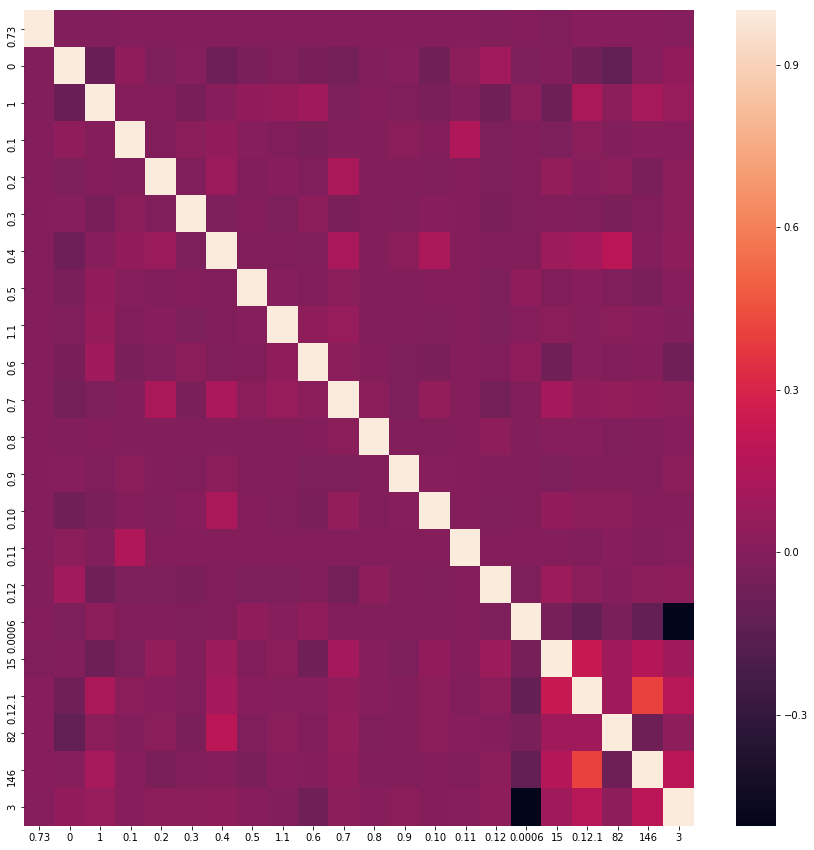

In [0]:
import seaborn as sns
import pandas as pd

data = pd.read_table('/content/ann-train(1).data',delimiter='\t')

plt.figure(figsize=(15,15)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(data.corr())

#INDICE DE FISHER

<Figure size 576x576 with 0 Axes>

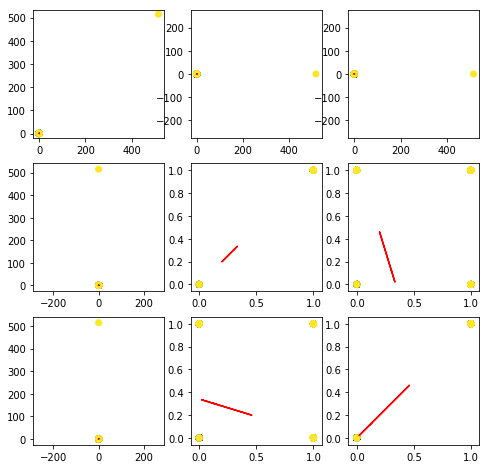

<Figure size 576x576 with 0 Axes>

In [0]:
import numpy as np
trainfisher = np.loadtxt('/content/ann-train(1).data',delimiter='\t')  # Assuming tab-delimiter

#Dividimos los datos de entrenamiento, las variables en X y el resultado o las clases en Y
X_train_fisher = trainfisher[:,0:21]
Y_train_fisher = trainfisher[:,21]

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
#X, y = iris.data, iris.target
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
pca = PCA(1) # only keep one dimension!
X_E = pca.fit_transform(X_train_fisher)

X_reconstructed = pca.inverse_transform(X_E)
plt.figure(figsize=(8,8))
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.scatter(X_train_fisher[:,i], X_train_fisher[:,j],c=Y_train_fisher)
        plt.plot(X_reconstructed[:,i], X_reconstructed[:,j],c='r')
        plt.axis('equal')
plt.figure(figsize=(8,8))




#Seleccion de caracteristicas

#Cual seleccionar

In [0]:
import time
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

trainfisher = np.loadtxt('/content/ann-train(1).data',delimiter='\t')  # Assuming tab-delimiter

#Dividimos los datos de entrenamiento, las variables en X y el resultado o las clases en Y
X_train_fisher2 = trainfisher[:,0:21]
Y_train_fisher2 = trainfisher[:,21]

def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

#Para calcular el costo computacional
tiempo_i = time.time()

#Creamos el clasificador SVM. Tenga en cuenta que el problema es multiclase. 
clf = svm.SVC(decision_function_shape='ovr', kernel='rbf', C = 100, gamma=0.0001)

#Implemetamos la metodología de validación

Errores = np.ones(5)
j = 0
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X_train_fisher2):
    
    X_train, X_test = X_train_fisher2[train_index], X_train_fisher2[test_index]
    y_train, y_test = Y_train_fisher2[train_index], Y_train_fisher2[test_index]  

    #Aquí se entran y se valida el modelo sin hacer selección de características
    
    ######
    
    # Entrenamiento el modelo.
    model = clf.fit(X_train,y_train)

    # Validación del modelo
    ypred = model.predict(X_test)
    
    #######

    Errores[j] = classification_error(ypred, y_test)
    j+=1

print("\nError de validación sin aplicar SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print(('\n\nTiempo total de ejecución: ' + str(time.time()-tiempo_i)) + ' segundos.')


Error de validación sin aplicar SFS: 0.05329457023907811 +/- 0.013050878449401433


Tiempo total de ejecución: 1.1677029132843018 segundos.


In [0]:


def select_features(modelo, n_features, fwd, fltg):
    
    sfs = SFS(modelo, 
           k_features=n_features, 
           forward=fwd,
           floating=fltg,
           verbose=1,
           scoring='accuracy',
           cv=0)
    
    return sfs

def invento (model, n_features, forward, floating):
  #Para calcular el costo computacional
  tiempo_i = time.time()

  #Implemetamos la metodología de validación 

  Errores = np.ones(5)
  j = 0
  kf = KFold(n_splits=5)

  for train_index, test_index in kf.split(X_train_fisher2):

      X_train, X_test = X_train_fisher2[train_index], X_train_fisher2[test_index]
      y_train, y_test = Y_train_fisher2[train_index], Y_train_fisher2[test_index]  

      #Aquí se entrena y se valida el modelo haciendo selección de características con diferentes estrategias

      #Complete el código llamando el método select_features con los parámetros correspondientes para responder el
      #Ejercicio 3.1
      sf = select_features(model,n_features, forward, floating) #Complete el código aquí
      
      #Complete el código para entrenar el modelo con las características seleccionadas. Tenga en cuenta
      #la metodología de validación aplicada para que pase las muestras de entrenamiento correctamente.
      sf = sf.fit(X_train,y_train)#Complete el código aquí
      nombre=sf.k_feature_idx_
      Errores[j] = 1-sf.k_score_
      j+=1

  print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

  print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )
  tiempor=time.time()-tiempo_i
  print ("\n\nTiempo total de ejecución: " + str(tiempor) + " segundos.")

  #print str(ypred)
  #print str(y_test)
  return np.mean(Errores), np.std(Errores), tiempor, nombre

In [0]:
import pandas as pd
#import qgrid
df_types = pd.DataFrame({
    'Tecnica' : pd.Series(['SVM sin selección','SVM + SFS','SVM + SFS','SVM + SFS','SVM + SBS','SVM + SBS','SVM + SBS','SVM + SFFS','SVM + SFFS','SVM + SFFS','SVM + SBFS','SVM + SBFS','SVM + SBFS']),
    '# de características seleccionadas' : pd.Series([21,7,10,14,7,10,14,7,10,14,7,10,14]),
    'forward' : pd.Series([None,True,True,True,False,False,False,True,True,True,True,True,True]),
    'floating' : pd.Series([None,False,False,False,False,False,False,True,True,True,True,True,True])
    })
df_types["Error de validación"] = ""
df_types["IC(std)"] = ""
df_types["Tiempo de ejecución"] = ""

df_types.set_index(['Tecnica','# de características seleccionadas', 'forward', 'floating'], inplace=True)
#df_types["Error de validación"][8] = "0.019"
#df_types["IC(std)"][8] = "0.002"
#df_types["Tiempo de ejecución"][8] = "107.9 s"

for i in df_types.index:
    print(i[0])
    print(i[1])
    print(i)
    #print(i[3])
    ED=invento(clf, i[1], i[2], i[3])
    df_types["Error de validación"][i] = float(ED[0])
    df_types["IC(std)"][i] = float(ED[1])
    df_types["Tiempo de ejecución"][i] = float(ED[2])

#df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

SVM sin selección
21
('SVM sin selección', 21, nan, nan)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBacken


Error de validación aplicando SFS: 0.040297141029636996 +/- 0.001932422111710007

Eficiencia en validación aplicando SFS: 96.02385685884693%


Tiempo total de ejecución: 694.9566235542297 segundos.
SVM + SFS
7
('SVM + SFS', 7, True, False)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.0s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.0s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs


Error de validación aplicando SFS: 0.04023085001206987 +/- 0.001753337424277055

Eficiencia en validación aplicando SFS: 96.0569913850232%


Tiempo total de ejecución: 105.66073417663574 segundos.
SVM + SFS
10
('SVM + SFS', 10, True, False)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.0s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.0s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(


Error de validación aplicando SFS: 0.04009831190736477 +/- 0.00192562923570293

Eficiencia en validación aplicando SFS: 96.0569913850232%


Tiempo total de ejecución: 149.7385060787201 segundos.
SVM + SFS
14
('SVM + SFS', 14, True, False)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
Features: 4/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.0s finished
Features: 5/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.0s finished
Features: 6/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(


Error de validación aplicando SFS: 0.04016460292493189 +/- 0.002041103587405238

Eficiencia en validación aplicando SFS: 96.0569913850232%


Tiempo total de ejecución: 196.51412105560303 segundos.
SVM + SBS
7
('SVM + SBS', 7, False, False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.3s finished
Features: 20/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.4s finished
Features: 19/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.0s finished
Features: 18/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.2s finished
Features: 17/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.0s finished
Features: 16/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    6.6s finished
Features: 15/7[Parallel(


Error de validación aplicando SFS: 0.040230871977284456 +/- 0.001909753914118905

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 394.28608107566833 segundos.
SVM + SBS
10
('SVM + SBS', 10, False, False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.3s finished
Features: 20/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.2s finished
Features: 19/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.9s finished
Features: 18/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.2s finished
Features: 17/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    6.9s finished
Features: 16/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    6.5s finished
Features: 15/10[Par


Error de validación aplicando SFS: 0.04009831190736479 +/- 0.0018677442513386328

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 331.31898522377014 segundos.
SVM + SBS
14
('SVM + SBS', 14, False, False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.3s finished
Features: 20/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.2s finished
Features: 19/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.8s finished
Features: 18/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.2s finished
Features: 17/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.0s finished
Features: 16/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    6.5s finished
Features: 15/14[Par


Error de validación aplicando SFS: 0.04009831190736479 +/- 0.0018677442513386328

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 231.91778373718262 segundos.
SVM + SFFS
7
('SVM + SFFS', 7, True, True)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   


Error de validación aplicando SFS: 0.04016458095971733 +/- 0.0017882645769558587

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 177.2120463848114 segundos.
SVM + SFFS
10
('SVM + SFFS', 10, True, True)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:


Error de validación aplicando SFS: 0.04003204285501223 +/- 0.001952992493078161

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 279.26288962364197 segundos.
SVM + SFFS
14
('SVM + SFFS', 14, True, True)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:


Error de validación aplicando SFS: 0.04009833387257935 +/- 0.002069062992026016

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 420.3575119972229 segundos.
SVM + SBFS
7
('SVM + SBFS', 7, True, True)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   


Error de validación aplicando SFS: 0.04016458095971733 +/- 0.0017882645769558587

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 177.19891166687012 segundos.
SVM + SBFS
10
('SVM + SBFS', 10, True, True)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:


Error de validación aplicando SFS: 0.04003204285501223 +/- 0.001952992493078161

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 279.2865195274353 segundos.
SVM + SBFS
14
('SVM + SBFS', 14, True, True)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:


Error de validación aplicando SFS: 0.04009833387257935 +/- 0.002069062992026016

Eficiencia en validación aplicando SFS: 96.09012591119946%


Tiempo total de ejecución: 420.7627260684967 segundos.


In [0]:
df_types

Error de validación  ... Tiempo de ejecución
Tecnica           # de características seleccionadas forward floating                      ...                    
SVM sin selección 21                                 NaN     NaN                0.0402971  ...             694.957
SVM + SFS         7                                  True    False              0.0402309  ...             105.661
                  10                                 True    False              0.0400983  ...             149.739
                  14                                 True    False              0.0401646  ...             196.514
SVM + SBS         7                                  False   False              0.0402309  ...             394.286
                  10                                 False   False              0.0400983  ...             331.319
                  14                                 False   False              0.0400983  ...             231.918
SVM + SFFS        7                                  True    True               0.0401646  ...             177.212
                  10                                 True    True                0.040032  ...             279.263
                  14                                 True    True               0.0400983  ...             420.358
SVM + SBFS        7                                  True    True               0.0401646  ...             177.199
                  10                                 True    True                0.040032  ...             279.287
                  14                                 True    True               0.0400983  ...             420.763

[13 rows x 3 columns]

In [0]:
ex=invento(clf, 14, True, False)
print(ex[3])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished
Features: 4/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.0s finished
Features: 5/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.0s finished
Features: 6/14[Parallel(


Error de validación aplicando SFS: 0.04016460292493189 +/- 0.002041103587405238

Eficiencia en validación aplicando SFS: 96.0569913850232%


Tiempo total de ejecución: 195.08250451087952 segundos.
(0, 2, 3, 4, 5, 6, 8, 9, 10, 16, 17, 18, 19, 20)


#LOS MEJORES MODELOS CON LAS CARACTERISTICAS

In [0]:
#1, 2, 3, 4, 6, 7, 8, 10, 14, 16, 17, 18, 19, 20
X_sf = np.column_stack((X[:,0],
                        X[:,2],
                        X[:,3],
                        X[:,4],
                        X[:,5],
                        X[:,6],
                        X[:,8],
                        X[:,9],
                        X[:,10],
                        X[:,16],
                        X[:,17],
                        X[:,18],
                        X[:,19],
                        X[:,20]))
#2, 5, 6, 9, 12, 15, 16, 19, 20
X_test_sf = np.column_stack((X_test_primero[:,0],
                             X_test_primero[:,2],
                             X_test_primero[:,3],
                             X_test_primero[:,4],
                             X_test_primero[:,5],
                             X_test_primero[:,6],
                             X_test_primero[:,8],
                             X_test_primero[:,9],
                             X_test_primero[:,10],
                             X_test_primero[:,16],
                             X_test_primero[:,17],
                             X_test_primero[:,18],
                             X_test_primero[:,19],
                             X_test_primero[:,20]))

#K-NN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
import sklearn.metrics as mt

porcentaje = 1.20
for i in range(1,11):
    tiempo_i = time.time()
    print("Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = %s" % (i))
    X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_sf, Y)
    
    min_max_scaler = MinMaxScaler().fit(X_resample)
    X_resample = min_max_scaler.transform(X_resample)
    X_test = min_max_scaler.transform(X_test_sf)
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_resample, Y_resample)
    Y_pred = knn.predict(X_test)
    
    print ("Numero de registros mal clasificados, %d de %d" % ((Y_test_primero != Y_pred).sum(),X_test.shape[0]))
    error = classification_error(Y_pred, Y_test_primero)
    print ("porcentaje de error de clasificacion = %s" % (error))
    print ("Tiempo de ejecucion = %s" % (time.time()-tiempo_i))
    print (mt.confusion_matrix(Y_test_primero, Y_pred, labels=None, sample_weight=None))

print ("\n")
n = 5
skf = StratifiedKFold(n_splits=n)

iteraciones = []
for i in range(1,11):
    tiempo_i = time.time()
    j = 0
    Errores = np.ones(n)
    
    print ("K vecinos evaluado: %s" % (i))
    for train_index, prueba_index in skf.split(X_sf, Y):
        X_train, X_prueba = X[train_index], X[prueba_index]
        Y_train, Y_prueba = Y[train_index], Y[prueba_index]
        
        X_resample, Y_resample =SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)
        
        min_max_scaler = MinMaxScaler().fit(X_resample)
        X_resample = min_max_scaler.transform(X_resample)
        X_prueba = min_max_scaler.transform(X_prueba)
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn = knn.fit(X_resample, Y_resample)
        
        #Evaluar base de datos prueba
        Y_pred = knn.predict(X_prueba)
        #print ("BASE DE DATOS PRUEBA\n")
        #print ("Numero de registros mal clasificados para k = %d, %d de %d" % (i,(Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
        #print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

        Errores[j] = classification_error(Y_pred, Y_prueba)
        j += 1

    iteraciones.append([(i, np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])
    
    #for i in Errores:
    #    print (i)

print ("\n")
for i in iteraciones:
    print ("K vecinos = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3]))

Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 1
Numero de registros mal clasificados, 227 de 3428
porcentaje de error de clasificacion = 0.06621936989498249
Tiempo de ejecucion = 0.2496023178100586
[[  46    0   27]
 [   0   13  164]
 [  29    7 3142]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 2
Numero de registros mal clasificados, 234 de 3428
porcentaje de error de clasificacion = 0.06826137689614936
Tiempo de ejecucion = 0.25347089767456055
[[  53    0   20]
 [   0   18  159]
 [  48    7 3123]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 3
Numero de registros mal clasificados, 233 de 3428
porcentaje de error de clasificacion = 0.06796966161026838
Tiempo de ejecucion = 0.2684018611907959
[[  47    0   26]
 [   0   10  167]
 [  40    0 3138]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 4
Numero de registros mal clasificados, 243 de 3428
porcentaje de error de clasificacion = 0.07088

#RNA

In [0]:
!pip install neurolab

     |████████████████████████████████| 655kB 2.9MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-cp36-none-any.whl size=22181 sha256=28f0fdd9db35bc30f0591917839be332c7c2c48502634c7f09ba254d481b496f
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


In [0]:
import neurolab as nl
from sklearn.preprocessing import OneHotEncoder

def config_net_parameters(X):
    config = []
    for i in range(0,np.size(X,1)):
        maxXi = max(X[:,i])
        minXi = min(X[:,i])
        config.append([minXi,maxXi])
                      
    return config

def classification_error_OHE(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        #Notar que y_est y y_real son matrices One-Hot Encoded (y_est tambien requiere un round para llevarla a binaria)
        #Por lo tanto se debe hacer la decodificación de estas matrices para comparar los valores predichos y los
        #Teóricos. Note que en una predicción correcta deben coindidir las posiciones de los arreglos que estén
        #activadas (bit 1 o hot :)!)
        pos_y_e = np.argmax(y_e)
        pos_y_r = np.argmax(y_r)
        if (pos_y_e) != pos_y_r:
            err += 1

    return err/np.size(y_est)

def oneHotEncoder(y):
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    return onehot_encoded
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


porcentaje = 1.20
for i in range(1,4):
    for j in range(10,41,10):
        tiempo_i = time.time()
        epocas = 10**i
        neuronas = j
        
        print("Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, Epocas = %s, Neuronas Capa Oculta = %s" % (epocas, neuronas))
        X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_sf, Y)
    
        min_max_scaler = MinMaxScaler().fit(X_resample)
        X_resample = min_max_scaler.transform(X_resample)
        X_test = min_max_scaler.transform(X_test_sf)
        
        net = nl.net.newff(config_net_parameters(X_resample),[neuronas,3],transf=[nl.trans.LogSig(),nl.trans.SoftMax()])
        Y_resample_OHE = oneHotEncoder(Y_resample)
        Y_test_OHE = oneHotEncoder(Y_test_primero)
        err = net.train(X_resample, Y_resample_OHE, epochs = epocas)
        
        Y_pred = net.sim(X_test)    
        
        error = classification_error_OHE(Y_pred, Y_test_OHE)
        print ("porcentaje de error de clasificacion = %s" % (error))
        print ("Tiempo de ejecucion = %s" % (time.time()-tiempo_i))
print ("\n")

n = 5
skf = StratifiedKFold(n_splits=n)
print (config_net_parameters(X))

porcentaje = 1.20
iteraciones = []

for i in range(1,5):
    for j in range(10,51,10):
        k = 0
        Errores = np.ones(n)
        Errores_test = np.ones(n)
        epocas = 10**i
        neuronas = j
        
        tiempo_i = time.time()
        print ("Evaluando Epocas = %s, Neuronas Capa Oculta = %s" % (epocas, neuronas))
        for train_index, prueba_index in skf.split(X_sf,Y):
            X_train, X_prueba = X_train_normal[train_index], X_train_normal[prueba_index]
            Y_train, Y_prueba = Y[train_index], Y[prueba_index]

            X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)
            
            #min_max_scaler = MinMaxScaler().fit(X_resample)
            #X_resample = min_max_scaler.transform(X_resample)
            #X_prueba = min_max_scaler.transform(X_prueba)
            
            Y_resample_OHE = oneHotEncoder(Y_resample)
            Y_prueba_OHE = oneHotEncoder(Y_prueba)
            
            net = nl.net.newff(config_net_parameters(X_resample),[neuronas,3],transf=[nl.trans.LogSig(),nl.trans.SoftMax()])
            err = net.train(X_resample, Y_resample_OHE, epochs = epocas)

            #Evaluar base de datos prueba
            Y_pred = net.sim(X_prueba)
            #print ("BASE DE DATOS PRUEBA\n")
            #print ("Numero de registros mal clasificados para k = %d, %d de %d" % (i,(Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
            #print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

            Errores[k] = classification_error_OHE(Y_pred, Y_prueba_OHE)
            k += 1

        iteraciones.append([(epocas, neuronas, np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])

        #for i in Errores:
        #    print (i)

print ("\n")
for i in iteraciones:
    print ("Epocas = %s, Neuronas Capa Oculta = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3],i[0][4]))

Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, Epocas = 10, Neuronas Capa Oculta = 10
porcentaje de error de clasificacion = 0.024309607156748347
Tiempo de ejecucion = 11.51528000831604
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, Epocas = 10, Neuronas Capa Oculta = 20
porcentaje de error de clasificacion = 0.024309607156748347
Tiempo de ejecucion = 16.41270112991333
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, Epocas = 10, Neuronas Capa Oculta = 30
porcentaje de error de clasificacion = 0.024309607156748347
Tiempo de ejecucion = 36.55770015716553
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, Epocas = 10, Neuronas Capa Oculta = 40
porcentaje de error de clasificacion = 0.024309607156748347
Tiempo de ejecucion = 1.4616260528564453
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, Epocas = 100, Neuronas Capa Oculta = 10
porcentaje de error de clasificacion = 0.024309607156748347
Tiempo de eje

/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10, Neuronas Capa Oculta = 20


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


The maximum number of train epochs is reached
Evaluando Epocas = 10, Neuronas Capa Oculta = 30
The maximum number of train epochs is reached


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10, Neuronas Capa Oculta = 40
The maximum number of train epochs is reached


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10, Neuronas Capa Oculta = 50
The maximum number of train epochs is reached


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 100, Neuronas Capa Oculta = 10


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 100, Neuronas Capa Oculta = 20


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 100, Neuronas Capa Oculta = 30


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 100, Neuronas Capa Oculta = 40


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 100, Neuronas Capa Oculta = 50


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 1000, Neuronas Capa Oculta = 10


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 1000, Neuronas Capa Oculta = 20


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 1000, Neuronas Capa Oculta = 30


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 1000, Neuronas Capa Oculta = 40


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 1000, Neuronas Capa Oculta = 50


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10000, Neuronas Capa Oculta = 10


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10000, Neuronas Capa Oculta = 20


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10000, Neuronas Capa Oculta = 30


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10000, Neuronas Capa Oculta = 40


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluando Epocas = 10000, Neuronas Capa Oculta = 50


/usr/local/lib/python3.6/dist-packages/neurolab/init.py:132: RuntimeWarning: divide by zero encountered in true_divide
  x = 2. / (minmax[:, 1] - minmax[:, 0])
/usr/local/lib/python3.6/dist-packages/neurolab/init.py:133: RuntimeWarning: invalid value encountered in multiply
  y = 1. - minmax[:, 1] * x
/usr/local/lib/python3.6/dist-packages/neurolab/layer.py:49: RuntimeWarning: invalid value encountered in multiply
  self.s = np.sum(self.np['w'] * inp, axis=1)
/usr/local/lib/python3.6/dist-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))




Epocas = 10, Neuronas Capa Oculta = 10, Error de Clasificacion = 0.08505260549076457, +/- 0.11994645281886503, tiempo = 72.98030376434326
Epocas = 10, Neuronas Capa Oculta = 20, Error de Clasificacion = 0.08505260549076457, +/- 0.11994645281886503, tiempo = 38.14847254753113
Epocas = 10, Neuronas Capa Oculta = 30, Error de Clasificacion = 0.08505260549076457, +/- 0.11994645281886503, tiempo = 58.13874292373657
Epocas = 10, Neuronas Capa Oculta = 40, Error de Clasificacion = 0.08505260549076457, +/- 0.11994645281886503, tiempo = 96.47029662132263
Epocas = 10, Neuronas Capa Oculta = 50, Error de Clasificacion = 0.08716900760716668, +/- 0.11896765721543111, tiempo = 58.83882784843445
Epocas = 100, Neuronas Capa Oculta = 10, Error de Clasificacion = 0.08505260549076457, +/- 0.11994645281886503, tiempo = 104.77096629142761
Epocas = 100, Neuronas Capa Oculta = 20, Error de Clasificacion = 0.08505260549076457, +/- 0.11994645281886503, tiempo = 129.9374496936798
Epocas = 100, Neuronas Capa O

#RF

In [0]:
from sklearn.ensemble import RandomForestClassifier

porcentaje = 1.20
for i in range(10,101,10):
    for k in range(5,26,5):
        tiempo_i = time.time()
        print("Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = %s" % (i))
        X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_sf, Y)

        min_max_scaler = MinMaxScaler().fit(X_resample)
        X_resample = min_max_scaler.transform(X_resample)
        X_test = min_max_scaler.transform(X_test_sf)

        rfc = RandomForestClassifier(n_estimators = i, max_depth = k)
        rfc = rfc.fit(X_resample, Y_resample)
        Y_pred = rfc.predict(X_test)

        print ("Numero de registros mal clasificados, %d de %d" % ((Y_test_primero != Y_pred).sum(),X_test.shape[0]))
        error = classification_error(Y_pred, Y_test_primero)
        print ("porcentaje de error de clasificacion = %s" % (error))
        print ("Tiempo de ejecucion = %s" % (time.time()-tiempo_i))
        print (mt.confusion_matrix(Y_test_primero, Y_pred, labels=None, sample_weight=None))
print ("\n")

n = 5
skf = StratifiedKFold(n_splits=n)

porcentaje = 1.20
iteraciones = []

for i in range(10,101,10):
    for k in range(5,26,5):
        tiempo_i = time.time()
        j = 0
        Errores = np.ones(n)

        print ("Arboles evaluados: %s, Maxima Profundidad: %s" % (i,k))
        for train_index, prueba_index in skf.split(X_sf, Y):
            X_train, X_prueba = X[train_index], X[prueba_index]
            Y_train, Y_prueba = Y[train_index], Y[prueba_index]

            X_resample, Y_resample =SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)

            min_max_scaler = MinMaxScaler().fit(X_resample)
            X_resample = min_max_scaler.transform(X_resample)
            X_prueba = min_max_scaler.transform(X_prueba)
            
            rfc = RandomForestClassifier(n_estimators = i, max_depth = k)
            rfc = rfc.fit(X_resample, Y_resample)

            #Evaluar base de datos prueba
            Y_pred = rfc.predict(X_prueba)
            #print ("BASE DE DATOS PRUEBA\n")
            #print ("Numero de registros mal clasificados para k = %d, %d de %d" % (i,(Y_prueba != Y_pred).sum(),X_prueba.shape[0]))
            #print (mt.confusion_matrix(Y_prueba, Y_pred, labels=None, sample_weight=None))

            Errores[j] = classification_error(Y_pred, Y_prueba)
            j += 1

        iteraciones.append([(i, k, np.mean(Errores), np.std(Errores), time.time()-tiempo_i)])
    
    #for i in Errores:
    #    print (i)

print ("\n")
for i in iteraciones:
    print ("Arboles = %s, Maxima Profundidad = %s, Error de Clasificacion = %s, +/- %s, tiempo = %s" % (i[0][0],i[0][1],i[0][2],i[0][3],i[0][4]))

Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 10
Numero de registros mal clasificados, 187 de 3428
porcentaje de error de clasificacion = 0.05455075845974329
Tiempo de ejecucion = 0.10994386672973633
[[  64    0    9]
 [   1    9  167]
 [   9    1 3168]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 10
Numero de registros mal clasificados, 159 de 3428
porcentaje de error de clasificacion = 0.04638273045507585
Tiempo de ejecucion = 0.11150193214416504
[[  65    1    7]
 [   3   50  124]
 [  14   10 3154]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 10
Numero de registros mal clasificados, 154 de 3428
porcentaje de error de clasificacion = 0.044924154025670945
Tiempo de ejecucion = 0.10743308067321777
[[  64    1    8]
 [   2   56  119]
 [   8   16 3154]]
Evaluacion de las bases de datos completa TRAIN vs TEST sugerida, k = 10
Numero de registros mal clasificados, 155 de 3428
porcentaje de error de clasificacion = 

#Extracción de Caracteristicas

In [0]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis as PCA
from mlxtend.feature_extraction import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore")
import time

trainfisher2 = np.loadtxt('/content/ann-train(1).data',delimiter='\t')  # Assuming tab-delimiter

#Dividimos los datos de entrenamiento, las variables en X y el resultado o las clases en Y
X_train_fisher3 = trainfisher2[:,0:21]
Y_train_fisher3 = trainfisher2[:,21]


def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

#Para calcular el costo computacional
tiempo_i = time.time()

#Creamos el clasificador SVM. Tenga en cuenta que el problema es multiclase. 
clf = svm.SVC(decision_function_shape='ovr', kernel='rbf', C = 100, gamma=0.0001)

#Implemetamos la metodología de validación

Errores = np.ones(5)
j = 0
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X_train_fisher3):
    
    X_train, X_test = X_train_fisher3[train_index], X_train_fisher3[test_index]
    y_train, y_test = Y_train_fisher3[train_index], Y_train_fisher3[test_index]  

    #Aquí se entran y se valida el modelo sin hacer selección de características
    
    ######
    
    # Entrenamiento el modelo.
    model = clf.fit(X_train,y_train)

    # Validación del modelo
    ypred = model.predict(X_test)
    
    #######

    Errores[j] = classification_error(ypred, y_test)
    j+=1

print("\nError de validación sin aplicar extracción: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")

#print str(ypred)
#print str(y_test)


Error de validación sin aplicar extracción: 0.05329457023907811 +/- 0.013050878449401433


Tiempo total de ejecución: 1.148186445236206 segundos.


In [0]:
def extract_features(tipo, n):
    
    if tipo == 'pca':
    
        ext = PCA(n_components=n)
    
        return ext

    elif tipo == 'lda':
        
        ext = LDA(n_discriminants=n)
        
        return ext
    
    else:
        print ("Ingrese un método válido (pca o lda)\n")

def invento(tipazo, numero):
  #Para calcular el costo computacional
  tiempo_i = time.time()
  global X_train_fisher3
  global Y_train_fisher3

  #Estandarizamos los datos
  X_train_fisher3 = standardize(X_train_fisher3)

  #Implemetamos la metodología de validación cross validation con 10 folds

  Errores = np.ones(5)
  j = 0
  kf = KFold(n_splits=5)

  for train_index, test_index in kf.split(X_train_fisher3):

      #Aquí se aplica la extracción de características por PCA
      #Complete el código

      ex = extract_features(tipazo, numero)#Complete el código llamando el método extract_features. Tenga en cuenta lo que le pide el ejercicio 3.1

      #Fit de PCA
      ex = ex.fit(X)#Complete el código con el fit correspondiente

      #Transforme las variables y genere el nuevo espacio de características de menor dimensión
      X_ex = ex.transform(X_train_fisher3)#complete el código aquí para hacer la transformación


      #Aquí se aplica la extracción de características por LDA

      #OPCIONAL
      '''
      ex = #Complete el código llamando el método extract_features.Tenga en cuenta lo que le pide el ejercicio 3.1

      #Fit de LDA
      ex = #Complete el código con el fit correspondiente

      #Transforme las variables y genere el nuevo espacio de características de menor dimensión
      X_ex = #complete el código aquí para hacer la transformación
      '''

      #Se aplica CV-10

      X_train, X_test = X_ex[train_index], X_ex[test_index]
      y_train, y_test = Y[train_index], Y[test_index]  

      #Aquí se entrena y se valida el modelo luego de aplicar extracción de características con PCA o LDA

      ######

      # Entrenamiento el modelo.
      model = clf.fit(X_train,y_train)

      # Validación del modelo
      ypred = model.predict(X_test)

      #######
      
      Errores[j] = classification_error(ypred, y_test)
      j+=1


  print("\nError de validación aplicando extracción: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

  print("\nEficiencia en validación aplicando extracción: " + str((1-np.mean(Errores))*100) + "%" )
  tiempizimo=time.time()-tiempo_i
  print ("\n\nTiempo total de ejecución: " + str(tiempizimo) + " segundos.")

  #print str(ypred)
  #print str(y_test)
  return np.mean(Errores), np.std(Errores), tiempizimo

In [0]:
import pandas as pd
#import qgrid
df_types = pd.DataFrame({
    'Tecnica' : pd.Series(['SVM sin extracción','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA','SVM + PCA']),
    '# de características seleccionadas' : pd.Series(['N/A',2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]),
   })
df_types["Error de validación"] = ""
df_types["IC(std)"] = ""
df_types["Tiempo de ejecución"] = ""

df_types.set_index(['Tecnica','# de características seleccionadas'], inplace=True)
for i in df_types.index:
    print(i[1])
    if i[1]=='N/A':
      
      ED=invento('pca', None)
      df_types["Error de validación"][i] = float(ED[0])
      df_types["IC(std)"][i] = float(ED[1])
      df_types["Tiempo de ejecución"][i] = float(ED[2])
    else:
      ED=invento('pca', i[1])
      df_types["Error de validación"][i] = float(ED[0])
      df_types["IC(std)"][i] = float(ED[1])
      df_types["Tiempo de ejecución"][i] = float(ED[2])

#df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

N/A

Error de validación aplicando extracción: 0.06204226465473326 +/- 0.011751097897995567

Eficiencia en validación aplicando extracción: 93.79577353452667%


Tiempo total de ejecución: 0.9552099704742432 segundos.
2

Error de validación aplicando extracción: 0.07556308957085389 +/- 0.014357396335509363

Eficiencia en validación aplicando extracción: 92.44369104291461%


Tiempo total de ejecución: 0.33873939514160156 segundos.
3

Error de validación aplicando extracción: 0.07556308957085389 +/- 0.014357396335509363

Eficiencia en validación aplicando extracción: 92.44369104291461%


Tiempo total de ejecución: 0.4204075336456299 segundos.
4

Error de validación aplicando extracción: 0.07556308957085389 +/- 0.014357396335509363

Eficiencia en validación aplicando extracción: 92.44369104291461%


Tiempo total de ejecución: 0.6483590602874756 segundos.
5

Error de validación aplicando extracción: 0.06548808122683437 +/- 0.01132898304244193

Eficiencia en validación aplicando extracción: 

In [0]:
df_types

Error de validación  ... Tiempo de ejecución
Tecnica            # de características seleccionadas                      ...                    
SVM sin extracción N/A                                          0.0620423  ...             0.95521
SVM + PCA          2                                            0.0755631  ...            0.338739
                   3                                            0.0755631  ...            0.420408
                   4                                            0.0755631  ...            0.648359
                   5                                            0.0654881  ...            0.603029
                   6                                            0.0654881  ...            0.621018
                   7                                            0.0654881  ...            0.664228
                   8                                            0.0654884  ...            0.732428
                   9                                            0.0657537  ...             0.71856
                   10                                           0.0657537  ...            0.749384
                   11                                            0.063898  ...             0.75705
                   12                                           0.0636327  ...            0.763598
                   13                                           0.0633675  ...            0.802125
                   14                                            0.062837  ...            0.812018
                   15                                            0.062837  ...            0.826463
                   16                                            0.062837  ...             0.86007
                   17                                           0.0631022  ...            0.878698
                   18                                           0.0628373  ...            0.883724
                   19                                           0.0625724  ...            0.898955
                   20                                           0.0625724  ...            0.910439

[20 rows x 3 columns]

In [0]:
ED=invento('pca', 20
          )



Error de validación aplicando extracción: 0.06310256995801641 +/- 0.011423287263620728

Eficiencia en validación aplicando extracción: 93.68974300419836%


Tiempo total de ejecución: 0.9895925521850586 segundos.


#RF Extractor

In [0]:
def extract_features(tipo, n):
    if tipo == 'pca':
        ext = PCA(n_components=n)
        return ext
        
#Para calcular el costo computacional
tiempo_i = time.time()

#scaler = StandardScaler,min_max_scaler = MinMaxScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

n = 5

#print (np.argwhere(np.isnan(y)))
#print (np.argwhere(np.isnan(X)))

Errores_pca = np.ones(n)
skf = StratifiedKFold(n_splits=n)
rfc = RandomForestClassifier(n_estimators = 40, max_depth = 5)
porcentaje = 1.20
for i in range(1,21):
    print ("Evaluando %s caracteristicas" % (i))
    j = 0
    for train_index, prueba_index in skf.split(X, Y):
        #Aquí se aplica la extracción de características por PCA
        ex_pca = extract_features('pca', i)
        #Fit de PCA
        ex_pca.fit(X)
        #Transforme las variables y genere el nuevo espacio de características de menor dimensión
        X_ex_pca = ex_pca.transform(X)
    
        #Se aplica CV-5
        X_train, X_prueba = X_ex_pca[train_index], X_ex_pca[prueba_index]
        Y_train, Y_prueba = Y[train_index], Y[prueba_index]
        X_resample, Y_resample = SMOTEENN(sampling_strategy={1.0:int(clase2*porcentaje), 2.0:int(clase2*porcentaje)}).fit_resample(X_train, Y_train)
        #Aquí se entrena y se valida el modelo luego de aplicar extracción de características con PCA y LDA
        # Entrenamiento el modelo.
        model_pca = rfc.fit(X_resample,Y_resample)

        # Validación del modelo
        Y_pred_pca = model_pca.predict(X_prueba)

        Errores_pca[j] = classification_error(Y_pred_pca, Y_prueba)
        j+=1
        

    print("Error de validación aplicando extracción: " + str(np.mean(Errores_pca)) + " +/- " + str(np.std(Errores_pca)))
    print("Eficiencia en validación aplicando extracción: " + str((1-np.mean(Errores_pca))*100) + "%\n" )

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
#print str(ypred)
#print str(y_test)

Evaluando 1 caracteristicas
Error de validación aplicando extracción: 0.08457199618778469 +/- 0.00643332331073886
Eficiencia en validación aplicando extracción: 91.54280038122154%

Evaluando 2 caracteristicas
Error de validación aplicando extracción: 0.0752881616251976 +/- 0.00361497792741963
Eficiencia en validación aplicando extracción: 92.47118383748024%

Evaluando 3 caracteristicas
Error de validación aplicando extracción: 0.07502642012628556 +/- 0.002150984283948476
Eficiencia en validación aplicando extracción: 92.49735798737144%

Evaluando 4 caracteristicas
Error de validación aplicando extracción: 0.06893089054483212 +/- 0.005765955096158554
Eficiencia en validación aplicando extracción: 93.10691094551679%

Evaluando 5 caracteristicas
Error de validación aplicando extracción: 0.06839933164779474 +/- 0.006306034022150645
Eficiencia en validación aplicando extracción: 93.16006683522052%

Evaluando 6 caracteristicas
Error de validación aplicando extracción: 0.06866844825051732 +/-